Data Mining and Discovery |
Veera Raghunatha Reddy Naguru - 22028322 | Report

In [2]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

In [3]:
#Loading Sales Transactions dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/\
00396/Sales_Transactions_Dataset_Weekly.csv"
df = pd.read_csv(url)

#Looking at the head of the dataset
print("Data Head:")
print(df.head())

#df.to_csv('sales_transactions_dataset.csv')

Data Head:
  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  

In [4]:
#Displaying all Column Names
print("All Column Names:")
print(df.columns)

All Column Names:
Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)


In [5]:
#Looking at the description of all the columns from the Dataset
print("Data Description:")
print(df.describe())

Data Description:
               W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  ...  Normalized 42  \
count  811.000000  811.000000  811.000000  811.000000  ...     811.000000   
mean     9.720099    9.585697    9.784217    9.681874  ...       0.299149   
std     13.347375   1

In [6]:
#Looking if there is any missing values in our dataset
if df.isnull().values.any():
  print("Dataset contains missing values. Replacing them with 0")
  df.fillna(0, inplace=True)
else:
  print("Dataset does not contain missing values.")

Dataset does not contain missing values.


In [7]:
#Extracting relevant coolumns, weekly sales of each product
sales_data = df.iloc[:, 1:53]
products = df.iloc[:, 0]
sales_data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [8]:
#Reducing the dimesions of the data using PCA
pca = PCA(n_components=2)
sales_data_pca = pca.fit_transform(sales_data)
sales_data_pca[:5,:]

array([[  5.32103535,  -8.33027516],
       [-35.76406869,  -4.44224856],
       [ -1.85025025,  -1.92691426],
       [ -4.69102377,  -3.53692846],
       [ -2.95376087,   1.35753235]])

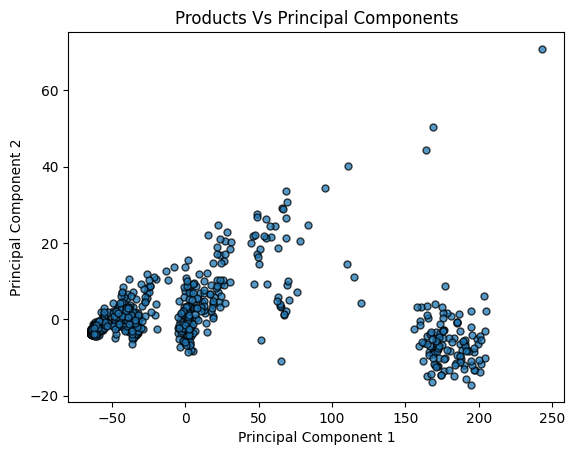

In [9]:
#Plotting the behaviour of our products over PCA Components
plt.figure()
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            edgecolors='k', s=25, alpha=0.75)
plt.title('Products Vs Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
#Scaling the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(sales_data.T)
standardized_data_pca = scaler.fit_transform(sales_data_pca.T)

In [11]:
#Producing Product Similarity Matrix for MST Clustering
product_similarity_matrix = np.corrcoef(standardized_data.T)
product_similarity_matrix=product_similarity_matrix

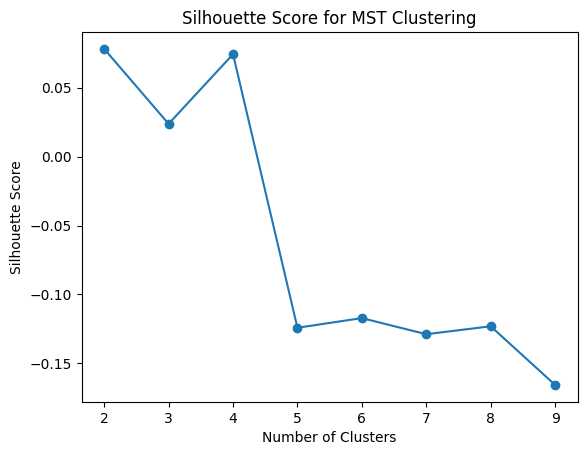

In [12]:
#Minimum Spanning Tree (MST)
silhouette_scores = []

for n_clusters in range(2, 10):
    mst_clusters = AgglomerativeClustering(n_clusters=n_clusters,
                                           linkage='complete').fit_predict(
                                               product_similarity_matrix)
    silhouette_scores.append(silhouette_score(sales_data, mst_clusters))

#Plot the silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for MST Clustering')
plt.show()

In [13]:
#Selecting Number of clusters as 2 for MST Clustering
mst_clusters = AgglomerativeClustering(n_clusters=2,
                                       linkage='complete').fit_predict(
                                           product_similarity_matrix)

#Print MST clusters
print("Minimum Spanning Tree (MST) - Graph-Based Clusters:")
for cluster_num in range(max(mst_clusters) + 1):
    print(f"Cluster {cluster_num + 1}: \
    {list(np.where(mst_clusters == cluster_num)[0][:15])}...")

Minimum Spanning Tree (MST) - Graph-Based Clusters:
Cluster 1:     [99, 107, 108, 110, 145, 147, 162, 199, 201, 203, 204, 206, 207, 208, 211]...
Cluster 2:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]...


In [14]:
#SNN Density-based Clustering
def compute_snn_similarity(data, k_neighbors=5):
    # Compute SNN similarity matrix
    knn = NearestNeighbors(n_neighbors=k_neighbors + 1)
    knn.fit(data)
    _, indices = knn.kneighbors(data)

    snn_similarity_matrix = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in indices[i, 1:]:
            common_neighbors = set(indices[i]).intersection(set(indices[j]))
            snn_similarity_matrix[i, j] = len(common_neighbors)

    return snn_similarity_matrix

#Perform SNN density-based clustering
snn_similarity_matrix = compute_snn_similarity(sales_data)
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
snn_clusters=dbscan.fit_predict(snn_similarity_matrix)

#Print SNN density-based clusters
print("SNN Density-based Clusters:")
for cluster_num in range(max(snn_clusters) + 1):
    print(f"Cluster {cluster_num + 1}: \
{list(np.where(snn_clusters == cluster_num)[0][:15])}...")

SNN Density-based Clusters:
Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ma

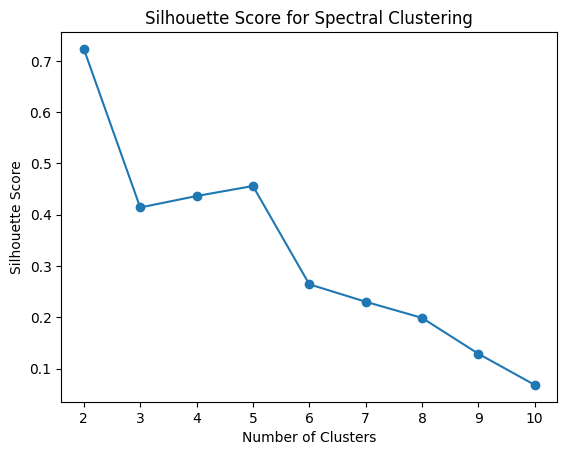

In [15]:
#Spectral Clustering
silhouette_scores = []

for n_clusters in range(2, 11):
    spectral_clusters = SpectralClustering(n_clusters=n_clusters,
                                           random_state=1,
                                           affinity='nearest_neighbors',
                                           gamma=500).fit_predict(
                                               sales_data_pca)
    silhouette_scores.append(silhouette_score(sales_data, spectral_clusters))

#Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Spectral Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clusters:
Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 19, 20]...
Cluster 2: [9, 14, 15, 16, 17, 18, 23, 24, 26, 27, 29, 33, 34, 35, 36]...


Text(0, 0.5, 'Principal Component 2')

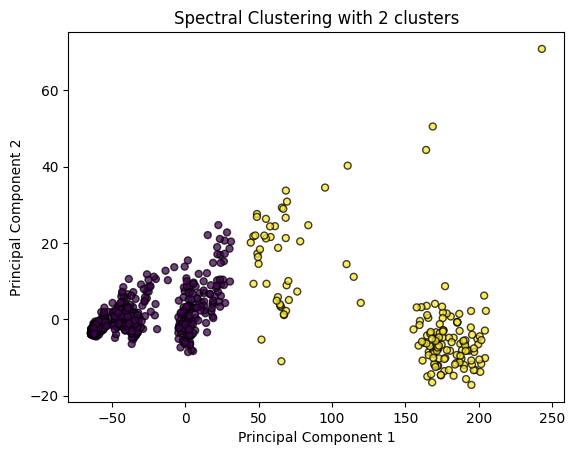

In [16]:
#Selecting Number of clusters as 2 for Spectral Clustering
spectral_clusters_2 = SpectralClustering(n_clusters=2, random_state=1,
                                         affinity='nearest_neighbors',
                                         gamma=1000).fit_predict(sales_data_pca)

#Print Spectral clusters
print("Spectral Clusters:")
for cluster_num in range(max(spectral_clusters_2) + 1):
    print(f"Cluster {cluster_num + 1}:\
 {list(np.where(spectral_clusters_2 == cluster_num)[0][:15])}...")

#Plotting clusters
plt.figure()
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=spectral_clusters_2, cmap='viridis', edgecolors='k', s=25,
            alpha = 0.75)
plt.title("Spectral Clustering with 2 clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [17]:
#Selecting Number of clusters as 5 for Spectral Clustering
spectral_clusters_5 = SpectralClustering(n_clusters=5, random_state=1,
                                         affinity='nearest_neighbors',
                                         gamma=1000).fit_predict(sales_data_pca)

#Print Spectral clusters
print("Spectral Clusters:")
for cluster_num in range(max(spectral_clusters_5) + 1):
    print(f"Cluster {cluster_num + 1}:\
 {list(np.where(spectral_clusters_5 == cluster_num)[0][:15])}...")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clusters:
Cluster 1: [211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]...
Cluster 2: [0, 2, 3, 4, 7, 8, 10, 12, 13, 19, 20, 21, 25, 28, 30]...
Cluster 3: [9, 50, 61, 106, 199, 201, 260, 262, 267, 269, 283, 285, 397, 400, 402]...
Cluster 4: [14, 15, 16, 17, 18, 23, 24, 26, 27, 29, 33, 34, 35, 36, 37]...
Cluster 5: [1, 5, 6, 11, 22, 52, 76, 97, 103, 104, 107, 110, 116, 122, 123]...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

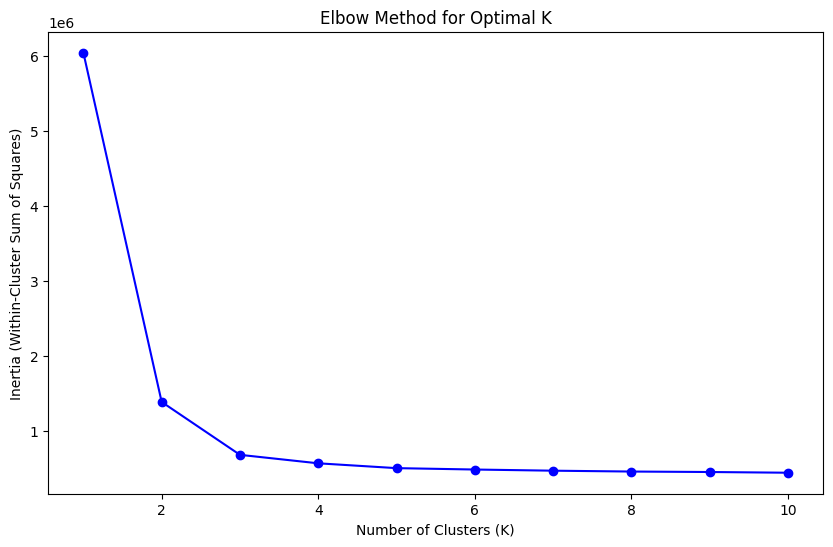

In [18]:
#K-Means Clustering
#Using elbow method to find optimal number of clusters for K-Means
inertia_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_data)
    inertia_values.append(kmeans.inertia_)

#Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o', linestyle='-',
         color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clusters (Optimal K):
Cluster 1: [0, 2, 3, 4, 7, 8, 9, 10, 12, 13, 19, 20, 21, 25, 28]...
Cluster 2: [14, 15, 16, 17, 18, 23, 24, 26, 27, 29, 33, 34, 35, 36, 37]...
Cluster 3: [1, 5, 6, 11, 22, 52, 76, 97, 103, 104, 107, 110, 116, 122, 123]...


Text(0, 0.5, 'Principal Component 2')

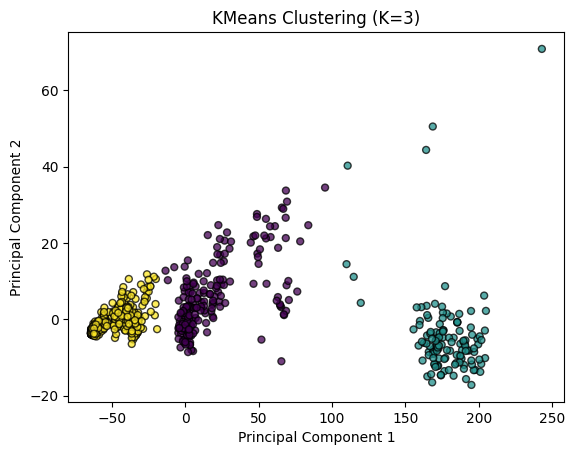

In [19]:
#Choosing Optimal K = 3, since there isn't much change in SSE after K = 3
optimal_k = 3

#Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters_K_3 = kmeans.fit_predict(sales_data)

#Print k-means clusters
print("K-Means Clusters (Optimal K):")
for cluster_num in range(max(kmeans_clusters_K_3) + 1):
    print(f"Cluster {cluster_num + 1}:\
 {list(np.where(kmeans_clusters_K_3 == cluster_num)[0][:15])}...")

#Plotting clusters
plt.figure()
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=kmeans_clusters_K_3, cmap='viridis', edgecolors='k', s=25,
            alpha=0.75)
plt.title('KMeans Clustering (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [20]:
#Compare the results using metrics
silhouette_mst = silhouette_score(sales_data, mst_clusters)
silhouette_spectral_2 = silhouette_score(sales_data, spectral_clusters_2)
silhouette_spectral_5 = silhouette_score(sales_data, spectral_clusters_5)
silhouette_kmeans_K_3 = silhouette_score(sales_data, kmeans_clusters_K_3)

print(f"Silhouette Score - Minimum Spanning Tree (MST): {silhouette_mst}")
print(f"Silhouette Score - Spectral Clustering (N=2): {silhouette_spectral_2}")
print(f"Silhouette Score - Spectral Clustering (N=5): {silhouette_spectral_5}")
print(f"Silhouette Score - K-Means Clustering (K=3): {silhouette_kmeans_K_3}")

Silhouette Score - Minimum Spanning Tree (MST): 0.07818294765128159
Silhouette Score - Spectral Clustering (N=2): 0.7231455189164224
Silhouette Score - Spectral Clustering (N=5): 0.45587324627573084
Silhouette Score - K-Means Clustering (K=3): 0.6150545325411856


In [21]:
#We can see the Sihouette score is around 0.61 for K=3
#Lets try K-Means with K = 2
optimal_k = 2

#Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters_K_2 = kmeans.fit_predict(sales_data)

#Print k-means clusters
print("\nK-Means Clusters (Optimal K):")
for cluster_num in range(max(kmeans_clusters_K_2) + 1):
    print(f"Cluster {cluster_num + 1}:\
 {list(np.where(kmeans_clusters_K_2 == cluster_num)[0][:15])}...")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



K-Means Clusters (Optimal K):
Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 19, 20]...
Cluster 2: [9, 14, 15, 16, 17, 18, 23, 24, 26, 27, 29, 33, 34, 35, 36]...


In [22]:
#Compare the results using metrics
silhouette_mst = silhouette_score(sales_data, mst_clusters)
silhouette_spectral_2 = silhouette_score(sales_data, spectral_clusters_2)
silhouette_spectral_5 = silhouette_score(sales_data, spectral_clusters_5)
silhouette_kmeans_K_3 = silhouette_score(sales_data, kmeans_clusters_K_3)
silhouette_kmeans_K_2 = silhouette_score(sales_data, kmeans_clusters_K_2)

print(f"Silhouette Score - Minimum Spanning Tree (MST): {silhouette_mst}")
print(f"Silhouette Score - Spectral Clustering (N=2): {silhouette_spectral_2}")
print(f"Silhouette Score - Spectral Clustering (N=5): {silhouette_spectral_5}")
print(f"Silhouette Score - K-Means Clustering (K=3): {silhouette_kmeans_K_3}")
print(f"Silhouette Score - K-Means Clustering (K=2): {silhouette_kmeans_K_2}")

Silhouette Score - Minimum Spanning Tree (MST): 0.07818294765128159
Silhouette Score - Spectral Clustering (N=2): 0.7231455189164224
Silhouette Score - Spectral Clustering (N=5): 0.45587324627573084
Silhouette Score - K-Means Clustering (K=3): 0.6150545325411856
Silhouette Score - K-Means Clustering (K=2): 0.7503359204357009


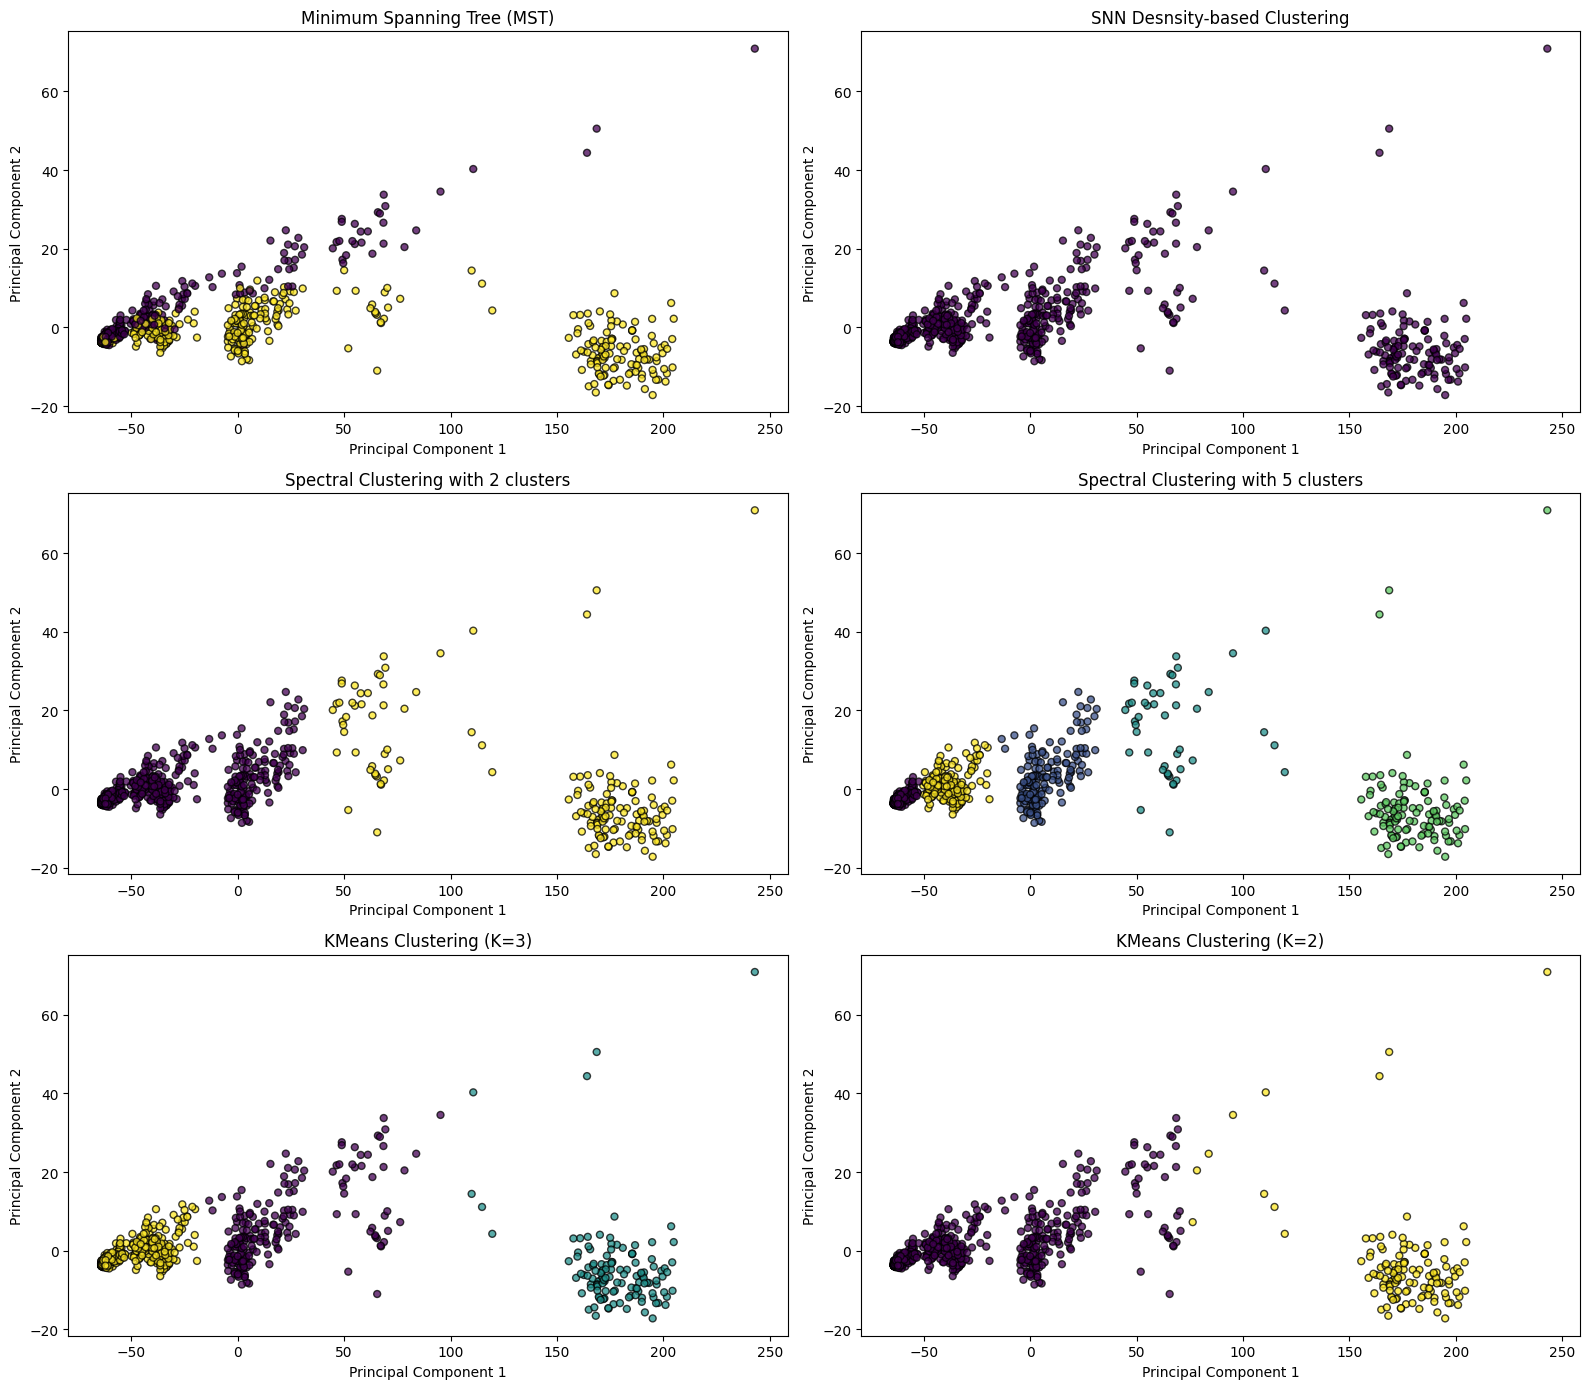

In [23]:
#Visualize the clusters for comparing different clustering algorithms
plt.figure(figsize=(16, 14))

#Minimum Spanning Tree (MST)
plt.subplot(3, 2, 1)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1], c=mst_clusters,
            cmap='viridis', edgecolors='k', s=25, alpha = 0.75)
plt.title("Minimum Spanning Tree (MST)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

snn_clusters
#SNN Desnsity-based Clustering
plt.subplot(3, 2, 2)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1], c=snn_clusters,
            cmap='viridis', edgecolors='k', s=25, alpha = 0.75)
plt.title("SNN Desnsity-based Clustering")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Spectral Clusters (Number of clusters = 2)
plt.subplot(3, 2, 3)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=spectral_clusters_2, cmap='viridis', edgecolors='k', s=25,
            alpha = 0.75)
plt.title("Spectral Clustering with 2 clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Spectral Clusters (Number of clusters = 5)
plt.subplot(3, 2, 4)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=spectral_clusters_5, cmap='viridis', edgecolors='k', s=25,
            alpha = 0.75)
plt.title("Spectral Clustering with 5 clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#K-Means Clusters (K=3)
plt.subplot(3, 2, 5)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=kmeans_clusters_K_3, cmap='viridis', edgecolors='k', s=25,
            alpha=0.75)
plt.title('KMeans Clustering (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#K-Means Clusters (K=2)
plt.subplot(3, 2, 6)
plt.scatter(sales_data_pca[:, 0], sales_data_pca[:, 1],
            c=kmeans_clusters_K_2, cmap='viridis', edgecolors='k', s=25,
            alpha=0.75)
plt.title('KMeans Clustering (K=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

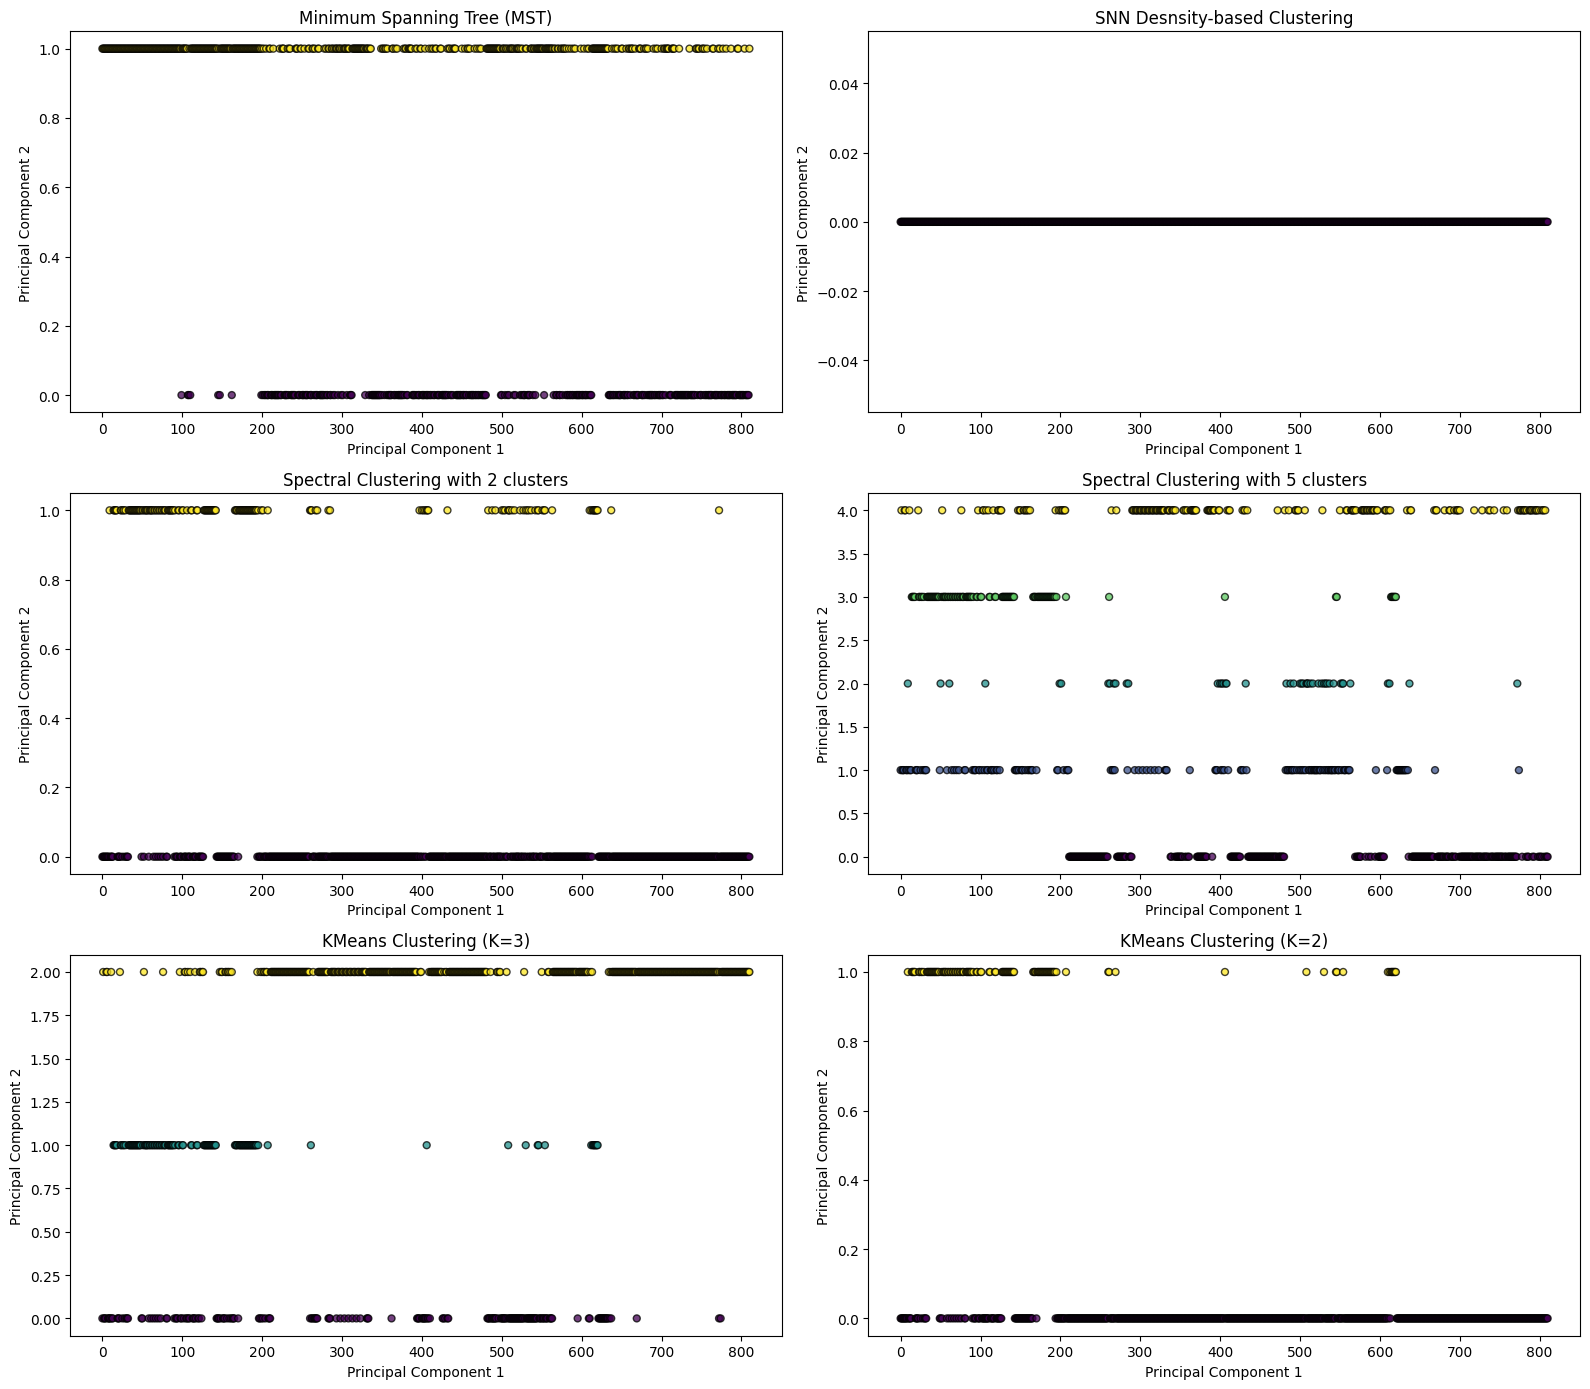

In [24]:
#Visualize the clusters
plt.figure(figsize=(16, 14))

#Minimum Spanning Tree (MST)
plt.subplot(3, 2, 1)
plt.scatter(range(len(mst_clusters)), mst_clusters, c=mst_clusters,
            cmap='viridis', edgecolors='k', s=25, alpha = 0.75)
plt.title("Minimum Spanning Tree (MST)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#SNN Desnsity-based Clustering
plt.subplot(3, 2, 2)
plt.scatter(range(len(snn_clusters)), snn_clusters, c=snn_clusters,
            cmap='viridis', edgecolors='k', s=25, alpha = 0.75)
plt.title("SNN Desnsity-based Clustering")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Spectral Clusters (Number of clusters = 2)
plt.subplot(3, 2, 3)
plt.scatter(range(len(spectral_clusters_2)), spectral_clusters_2,
            c=spectral_clusters_2, cmap='viridis', edgecolors='k', s=25,
            alpha = 0.75)
plt.title("Spectral Clustering with 2 clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Spectral Clusters (Number of clusters = 5)
plt.subplot(3, 2, 4)
plt.scatter(range(len(spectral_clusters_5)), spectral_clusters_5,
            c=spectral_clusters_5, cmap='viridis', edgecolors='k', s=25,
            alpha = 0.75)
plt.title("Spectral Clustering with 5 clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#K-Means Clusters (K=3)
plt.subplot(3, 2, 5)
plt.scatter(range(len(kmeans_clusters_K_3)), kmeans_clusters_K_3,
            c=kmeans_clusters_K_3, cmap='viridis', edgecolors='k', s=25,
            alpha=0.75)
plt.title('KMeans Clustering (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#K-Means Clusters (K=2)
plt.subplot(3, 2, 6)
plt.scatter(range(len(kmeans_clusters_K_2)), kmeans_clusters_K_2,
            c=kmeans_clusters_K_2, cmap='viridis', edgecolors='k', s=25,
            alpha=0.75)
plt.title('KMeans Clustering (K=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [25]:
 #Results and Discussion
 print('''
 It is observed that Spectral Clustering with N=2 have high silhouette score of
 0.75 and K-Means Clustering with K=2 has a silhouette score of 0.72 and if we
 look at the clusters they both grouoed the products very similarly.

 While Looking at SNN Density-based clustering, the algorithm built didn't
 worked as ist is supposed to work or that algorithm is not suitable for this
 dataset because it clustered all the products into one cluster.
 ''')


It is observed that Spectral Clustering with N=2 have high silhouette score of
0.75 and K-Means Clustering with K=2 has a silhouette score of 0.72 and if we
look at the clusters they both grouoed the products very similarly.

While Looking at SNN Density-based clustering, the algorithm built didn't
worked as ist is supposed to work or that algorithm is not suitable for this
dataset because it clustered all the products into one cluster.



In [36]:
#Clustered Products Performance
sales_data_CL_2 = sales_data.iloc[
    list(np.where(kmeans_clusters_K_2 == cluster_num)[0][:15]),:]
sales_data_CL_2.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
9,22,19,19,29,20,16,26,20,24,20,...,14,17,11,24,13,16,18,23,18,20
14,19,45,47,42,29,44,43,36,25,52,...,38,35,33,30,37,30,30,34,38,20
15,30,27,27,43,29,32,49,41,49,38,...,40,30,33,39,42,45,31,31,23,22
16,49,40,40,28,40,47,44,45,39,33,...,36,31,36,35,43,28,30,30,26,25
17,40,38,39,38,39,33,28,44,36,36,...,30,29,29,41,35,22,28,29,29,23


In [37]:
#Looking at max and minimum sales of our cluster products over weeks
sales_data_CL_2['Max Sales'] = sales_data_CL_2.max(axis=1)
sales_data_CL_2['Min Sales'] = sales_data_CL_2.min(axis=1)
sales_data_CL_2['Mean Sales'] = sales_data_CL_2.mean(axis=1)
sales_data_CL_2.head()

<ipython-input-37-804943f228f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_CL_2['Max Sales'] = sales_data_CL_2.max(axis=1)
<ipython-input-37-804943f228f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_CL_2['Min Sales'] = sales_data_CL_2.min(axis=1)
<ipython-input-37-804943f228f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W45,W46,W47,W48,W49,W50,W51,Max Sales,Min Sales,Mean Sales
9,22,19,19,29,20,16,26,20,24,20,...,24,13,16,18,23,18,20,33,9,19.481481
14,19,45,47,42,29,44,43,36,25,52,...,30,37,30,30,34,38,20,52,19,34.740741
15,30,27,27,43,29,32,49,41,49,38,...,39,42,45,31,31,23,22,54,22,36.129630
16,49,40,40,28,40,47,44,45,39,33,...,35,43,28,30,30,26,25,52,17,33.962963
17,40,38,39,38,39,33,28,44,36,36,...,41,35,22,28,29,29,23,48,20,32.407407


In [41]:
#Looking at max and minimum sales of our products over weeks
sales_data['Max Sales'] = sales_data.max(axis=1)
sales_data['Min Sales'] = sales_data.min(axis=1)
sales_data['Mean Sales'] = sales_data.mean(axis=1)
sales_data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W45,W46,W47,W48,W49,W50,W51,Max Sales,Min Sales,Mean Sales
0,11,12,10,8,13,12,14,21,6,14,...,10,12,3,7,6,5,10,21.0,3.0,9.722222
1,7,6,3,2,7,1,6,3,3,3,...,1,1,4,5,1,6,0,10.0,0.0,4.018519
2,7,11,8,9,10,8,7,13,12,6,...,5,7,8,14,8,8,7,14.0,3.0,8.685185
3,12,8,13,5,9,6,9,13,13,11,...,4,6,8,14,8,7,8,19.0,2.0,8.351852
4,8,5,13,11,6,7,9,14,9,9,...,12,6,6,5,11,8,9,18.0,3.0,8.537037
